In [1]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import pywt
except:
    ! pip install PyWavelets

try:
    import scaleogram as scg 
except:
    ! pip install scaleogram

In [2]:
%matplotlib notebook

Example taken from the https://github.com/alsauve/scaleogram webpage

In [3]:
scg.set_default_wavelet('cmor1-1.5')

<IPython.core.display.Javascript object>


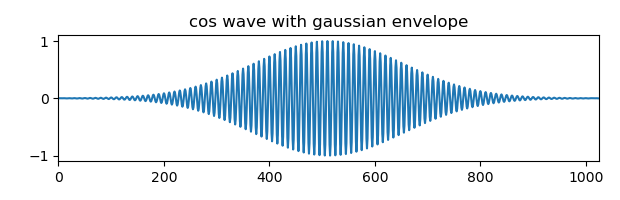

<IPython.core.display.Javascript object>


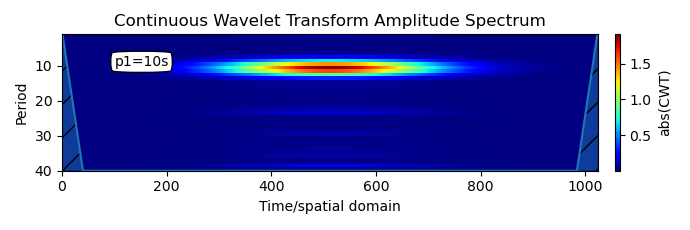

Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


In [4]:
# let consider a timeline with 1 sample / second
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 40) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

<IPython.core.display.Javascript object>


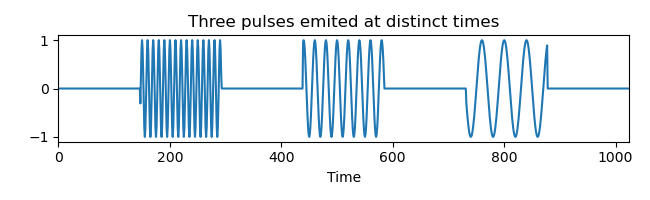

<IPython.core.display.Javascript object>


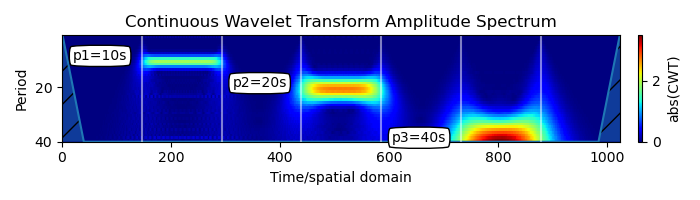

In [5]:
pulses = np.zeros(ns, dtype=np.float32)
steps  = np.linspace(0, ns, 8)
periods = [10, 20, 40]
for i in range(0,3):
    step_mask = (time > steps[i*2+1]) & (time < steps[i*2+2])
    pulses += np.cos(2*np.pi/periods[i]*time) * step_mask

# plot the pulses
fig1, ax1 = plt.subplots(1, 1, figsize=(6.5,2));  
lines = ax1.plot(pulses); ax1.set_xlim(0, len(time)); 
ax1.set_title("Three pulses emited at distinct times"); ax1.set_xlabel("Time")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(pulses, scales=scales, figsize=(7,2))

# add fancy helpers
for i in range(0, 3):
    txt = ax2.annotate("p%d=%ds"%(i+1,periods[i]), xy=(steps[i*2]+20, periods[i]), 
                       bbox=dict(boxstyle="round4", fc="w"))
    ax2.plot(steps[i*2+1]*np.ones(2), ax2.get_ylim(), '-w', alpha=0.5)
    ax2.plot(steps[i*2+2]*np.ones(2),   ax2.get_ylim(), '-w', alpha=0.5)
plt.tight_layout()

<IPython.core.display.Javascript object>


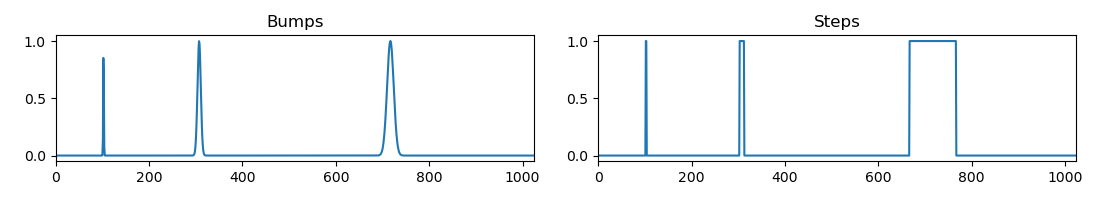

<IPython.core.display.Javascript object>


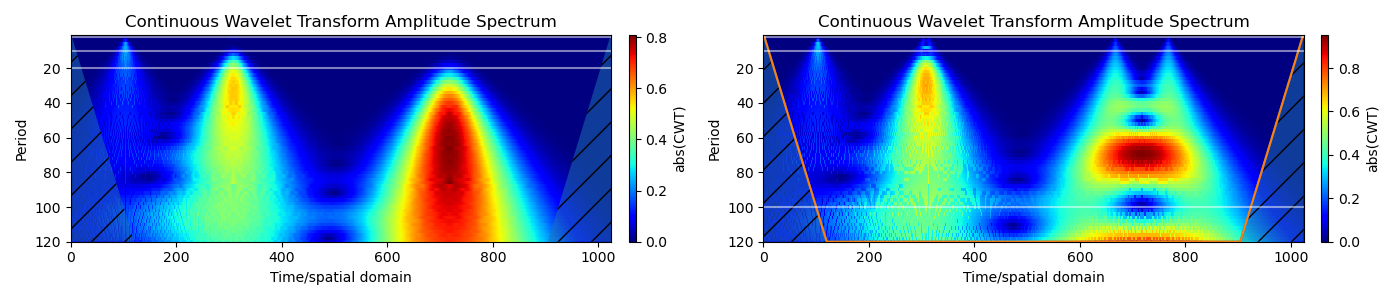

In [6]:
# several gaussian bumps given sigma
s1=1; s2=5; s3=10
events = [ns*0.1, ns*0.3, ns*0.7]
bumps = np.exp(-((time-events[0])/s1)**2) + np.exp(-((time-events[1])/s2)**2) + \
        np.exp(-((time-events[2])/s3)**2) 

# several steps given half-hidth
w1=1; w2=5; w3= 50
steps = ((time > events[0]-w1) & (time < events[0]+w1)) + \
    ((time > events[1]-w2) & (time < events[1]+w2)) + \
    ((time > events[2]-w3) & (time < events[2]+w3))

# plot the pulses
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 2)); 
ax1.set_title("Bumps"); ax2.set_title("Steps")
lines = ax1.plot(bumps); ax1.set_xlim(0, len(time))
lines = ax2.plot(steps); ax2.set_xlim(0, len(time))
fig1.tight_layout()

# and the scaleogram
scales_bumps = scg.periods2scales(np.arange(1, 120, 2) )
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14,3));  
ax3 = scg.cws(bumps, scales=scales_bumps, ax=ax3)
ax4 = scg.cws(steps, scales=scales_bumps, ax=ax4)
for bmpw, stepw in [(2*s1, 2*w1), (2*s2,2*w2), (2*s3, 2*w3)]:
    ax3.plot(ax3.get_xlim(), bmpw*np.ones(2), 'w-', alpha=0.5)
    ax4.plot(ax4.get_xlim(), stepw*np.ones(2), 'w-', alpha=0.5)
fig2.tight_layout()

For more material on relation between scale and frequency, see https://github.com/alsauve/scaleogram/blob/master/doc/scale-to-frequency.ipynb